In [1]:
import numpy as np
import pandas as pd

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Se carga el data set

In [61]:
df = pd.read_csv('fifa_data.csv')
len(df)

18207

Se elimina columna que no apotar valor al set de datos

In [62]:
df =df.drop(['Unnamed: 0'], axis=1)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [63]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

Se realiza una limpieza y cambio de formato de la columna Value para poder utilizarla en los siguientes analisis

In [64]:
df['Value'].unique()

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

In [65]:
df['Value'] = df['Value'].astype(str).apply(lambda x: x[1:-1])

In [67]:
df.replace(' ', np.nan, inplace = True)
df.replace('', np.nan, inplace = True)
df["Value"].replace(np.nan, 0, inplace=True)

In [68]:
df['Value'] = df['Value'].astype("float64")

In [69]:
df['Value'].unique()

array([110.5,  77. , 118.5,  72. , 102. ,  93. ,  67. ,  80. ,  51. ,
        68. ,  76.5,  44. ,  60. ,  63. ,  89. ,  83.5,  78. ,  58. ,
        53.5,  51.5,  38. ,  64.5,  27. ,  81. ,  69.5,  59.5,  62. ,
        73.5,  59. ,  46. ,  43. ,  36. ,  57. ,  24. ,  30. ,   4. ,
        64. ,  30.5,  62.5,  52. ,  45. ,  34. ,  46.5,  61. ,  41.5,
        44.5,  56.5,  53. ,  50. ,  55. ,  36.5,  45.5,  43.5,  35. ,
        39. ,  18. ,  21.5,  50.5,  54. ,  40.5,  37.5,  28.5,  37. ,
        32. ,  26. ,  33. ,  38.5,  35.5,   9. ,  15.5,  22. ,  14. ,
        42.5,  31.5,  42. ,  25. ,  29.5,  31. ,  24.5,  27.5,  29. ,
        16.5,  23. ,  19. ,   4.2,  40. ,  41. ,  28. ,  22.5,  34.5,
        32.5,  20. ,  26.5,  25.5,  21. ,  13. ,  17.5,  11.5,   8. ,
         6. ,  19.5,   6.5,  20.5,  23.5,  18.5,  17. ,  12.5,  15. ,
        13.5,   4.8,   3. ,   1.5,  16. ,  10. ,  11. ,   7. ,  14.5,
         5.5,  10.5,   4.5,  12. ,   0. ,   9.5,   8.5,   2. ,   1.7,
         1. ,   3.6,

Se analiza correlacion de las columnas Potential, Overall y Value

In [70]:
df[['Potential', 'Overall','Value']].corr()

,Potential,Overall,Value
Potential,1.000000,0.660939,-0.231048
Overall,0.660939,1.000000,-0.233330
Value,-0.231048,-0.233330,1.000000


(0.0, 96.4)

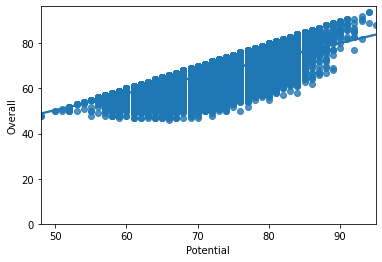

In [76]:
sns.regplot(x="Potential", y="Overall", data=df)
plt.ylim(0,)

(0.0, 1024.7362381781581)

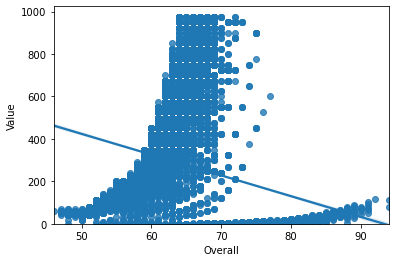

In [74]:
sns.regplot(x="Overall", y="Value", data=df)
plt.ylim(0,)